In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

# Load dataset
file_path = '/content/drive/MyDrive/Copy of npi.txt'
df = pd.read_csv(file_path, sep='\t', header=None)
df.columns = ['english', 'nepali', 'license_info']
df = df[['english', 'nepali']]
df.head()


,english,nepali
0,Who?,को?
1,Hide.,लुकाउनुहोस्।
2,Hide.,लुक।
3,Stay.,बस्नुहोस्।
4,Hello!,नमस्ते!


In [5]:
df['label'] = df['english'].apply(lambda x: 1 if len(x) > 15 else 0)
df['label'].value_counts()

,count
label,
1,2420
0,269


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
# Preprocessing function
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'@\w+|#', '', text)  # Remove mentions/hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers

    # Remove stopwords and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)

In [8]:
df['cleaned'] = df['english'].apply(preprocess_text)
df[['english', 'cleaned']].head()

,english,cleaned
0,Who?,
1,Hide.,hide
2,Hide.,hide
3,Stay.,stay
4,Hello!,hello


In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned'], df['label'], test_size=0.2, random_state=42)

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding to the 95th percentile
import numpy as np
max_len = int(np.percentile([len(x) for x in X_train_seq], 95))

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [13]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

rnn_model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [14]:
rnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

lstm_model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

In [16]:
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report

# Training the Simple RNN model
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es_rnn = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

rnn_history = rnn_model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[es_rnn]
)

y_rnn_pred = (rnn_model.predict(X_test_pad) > 0.5).astype("int32")
print("Simple RNN Accuracy:", accuracy_score(y_test, y_rnn_pred))
print(classification_report(y_test, y_rnn_pred))

Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.8634 - loss: 0.4121 - val_accuracy: 0.9052 - val_loss: 0.2373
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9309 - loss: 0.1708 - val_accuracy: 0.8922 - val_loss: 0.2220
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9651 - loss: 0.0927 - val_accuracy: 0.8792 - val_loss: 0.2740
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9802 - loss: 0.0582 - val_accuracy: 0.8941 - val_loss: 0.2578
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9766 - loss: 0.0598 - val_accuracy: 0.8885 - val_loss: 0.2857
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Simple RNN Accuracy: 0.8921933085501859
              precision    recall  f1-score   support

           0       0.46      0.41      0.43        54
           1       0.93      0.95      0.94       484

    accuracy                           0.89       538
   macro avg       0.70      0.68      0.69       538
weighted avg 

In [18]:
# Training the LSTM model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es_lstm = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

lstm_history = lstm_model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[es_lstm]
)

y_lstm_pred = (lstm_model.predict(X_test_pad) > 0.5).astype("int32")
print("LSTM Accuracy:", accuracy_score(y_test, y_lstm_pred))
print(classification_report(y_test, y_lstm_pred))

Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.8748 - loss: 0.5151 - val_accuracy: 0.8996 - val_loss: 0.3219
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9031 - loss: 0.2622 - val_accuracy: 0.9108 - val_loss: 0.2431
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9462 - loss: 0.1639 - val_accuracy: 0.9126 - val_loss: 0.2559
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9704 - loss: 0.0994 - val_accuracy: 0.8959 - val_loss: 0.2568
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9636 - loss: 0.1022 - val_accuracy: 0.9071 - val_loss: 0.2853
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
LSTM Accuracy: 0.9107806691449815
              precision    recall  f1-score   support

           0       0.61      0.31      0.41        54
           1       0.93      0.98      0.95       484

    accuracy                           0.91       538
   macro avg       0.77      0.65      0.68       538
weighted avg       

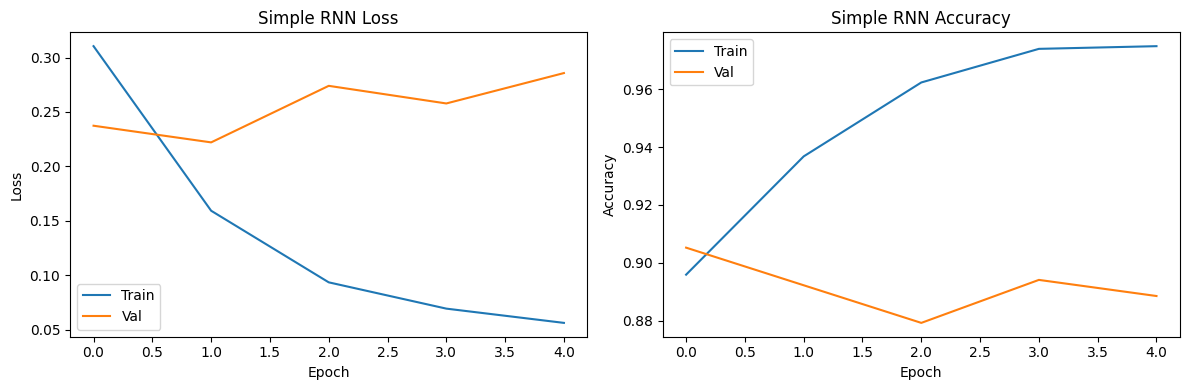

In [19]:
import matplotlib.pyplot as plt

def plot_rnn_history(history):
    plt.figure(figsize=(12, 4))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title('Simple RNN Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title('Simple RNN Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_rnn_history(rnn_history)

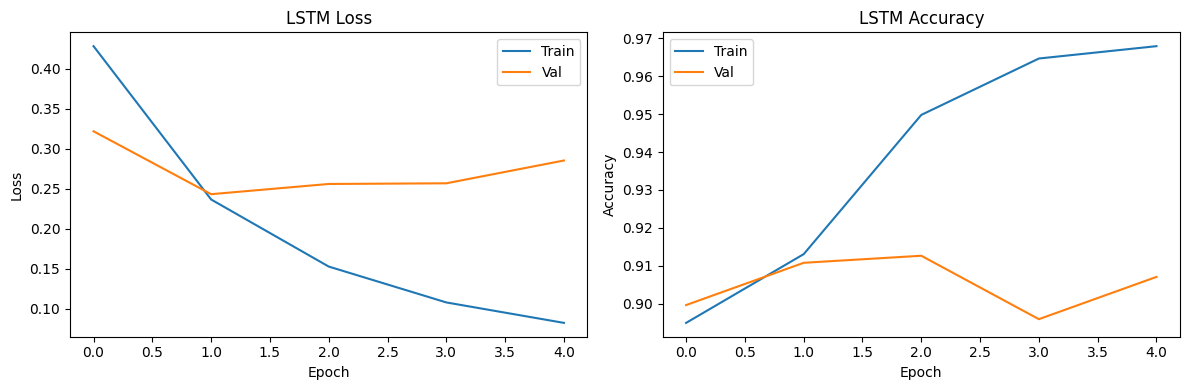

In [20]:
def plot_lstm_history(history):
    plt.figure(figsize=(12, 4))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title('LSTM Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title('LSTM Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_lstm_history(lstm_history)